In [7]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# === 样式设置 ===
plt.rcParams['figure.figsize'] = (25, 10)
plt.rcParams['axes.titlesize'] = 52
plt.rcParams['axes.labelsize'] = 52
plt.rcParams['lines.linewidth'] = 8
plt.rcParams['lines.markersize'] = 30
plt.rcParams['xtick.labelsize'] = 52
plt.rcParams['ytick.labelsize'] = 52
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize'] = 38
plt.rcParams['figure.dpi'] = 600

# 策略缩写映射
def policy_abbr(policy):
    abbr = []
    if "fcfs" in policy:
        abbr.append("FCFS")
    if "ldf" in policy:
        abbr.append("LDF")
    if "rej" in policy:
        abbr.append("R")
    if "credit" in policy:
        abbr.append("C")
    if "gate" in policy:
        abbr.append("G")
    return " + ".join(abbr)

# 文件列表
json_files = [
    "round1_fcfs_prompts_512_qps_16.json",
    "round1_fcfs_rej_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_prompts_512_qps_16.json"
]

# 读取数据
policy_abbrs, good_completion, ttft_violation, tpot_violation, request_goodput = [], [], [], [], []
for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        policy_abbrs.append(policy_abbr(data["policy"]))
        good_completion.append(data["good_completion"])
        ttft_violation.append(data["ttft_violation"])
        tpot_violation.append(data["tpot_violation"])
        request_goodput.append(data["request_goodput"])

# 绘图
x = np.arange(len(policy_abbrs))
width = 0.25

fig, ax1 = plt.subplots()

# 柱状图
bar1 = ax1.bar(x - width, good_completion, width, label='Good Completion', hatch='///')
bar2 = ax1.bar(x, ttft_violation, width, label='TTFT Violation', hatch='\\\\\\')
bar3 = ax1.bar(x + width, tpot_violation, width, label='TPOT Violation', hatch='xxx')

ax1.set_ylabel('# Completions / Violations')
ax1.set_xlabel('Policy')

# 替代策略名为 Policy 1, 2, ...
ax1.set_xticks(x)
ax1.set_xticklabels([f"Policy {i+1}" for i in range(len(policy_abbrs))])

# 折线图表示 Goodput
ax2 = ax1.twinx()
ax2.plot(x, request_goodput, 'o--', color='black', linewidth=3, label='Request Goodput')
ax2.set_ylabel('Request Goodput')

# 图例：分两部分，左边是柱状图指标，右边是策略组合说明
legend1 = ax1.legend(loc='upper left', title="Metrics", title_fontsize=40)
legend2 = ax1.legend([plt.Line2D([0], [0], color='black', marker='o', linestyle='--', linewidth=3)], 
                     ['Request Goodput'], loc='upper center')

# 策略缩写的 legend
legend3 = ax1.legend([plt.Rectangle((0, 0), 1, 1, color='gray', alpha=0)] * len(policy_abbrs),
                     policy_abbrs, title="Policy", loc='lower center', ncol=2, frameon=False, title_fontsize=40)

ax1.add_artist(legend1)
ax1.add_artist(legend2)

# plt.title('Completion / Violation and Goodput across Policies')
plt.tight_layout()
plt.show()


/tmp/ipykernel_987216/2600291515.py:93: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  policy_handles = [plt.Rectangle((0, 0), 1, 1, color=c, edgecolor='black') for c in bar_colors]


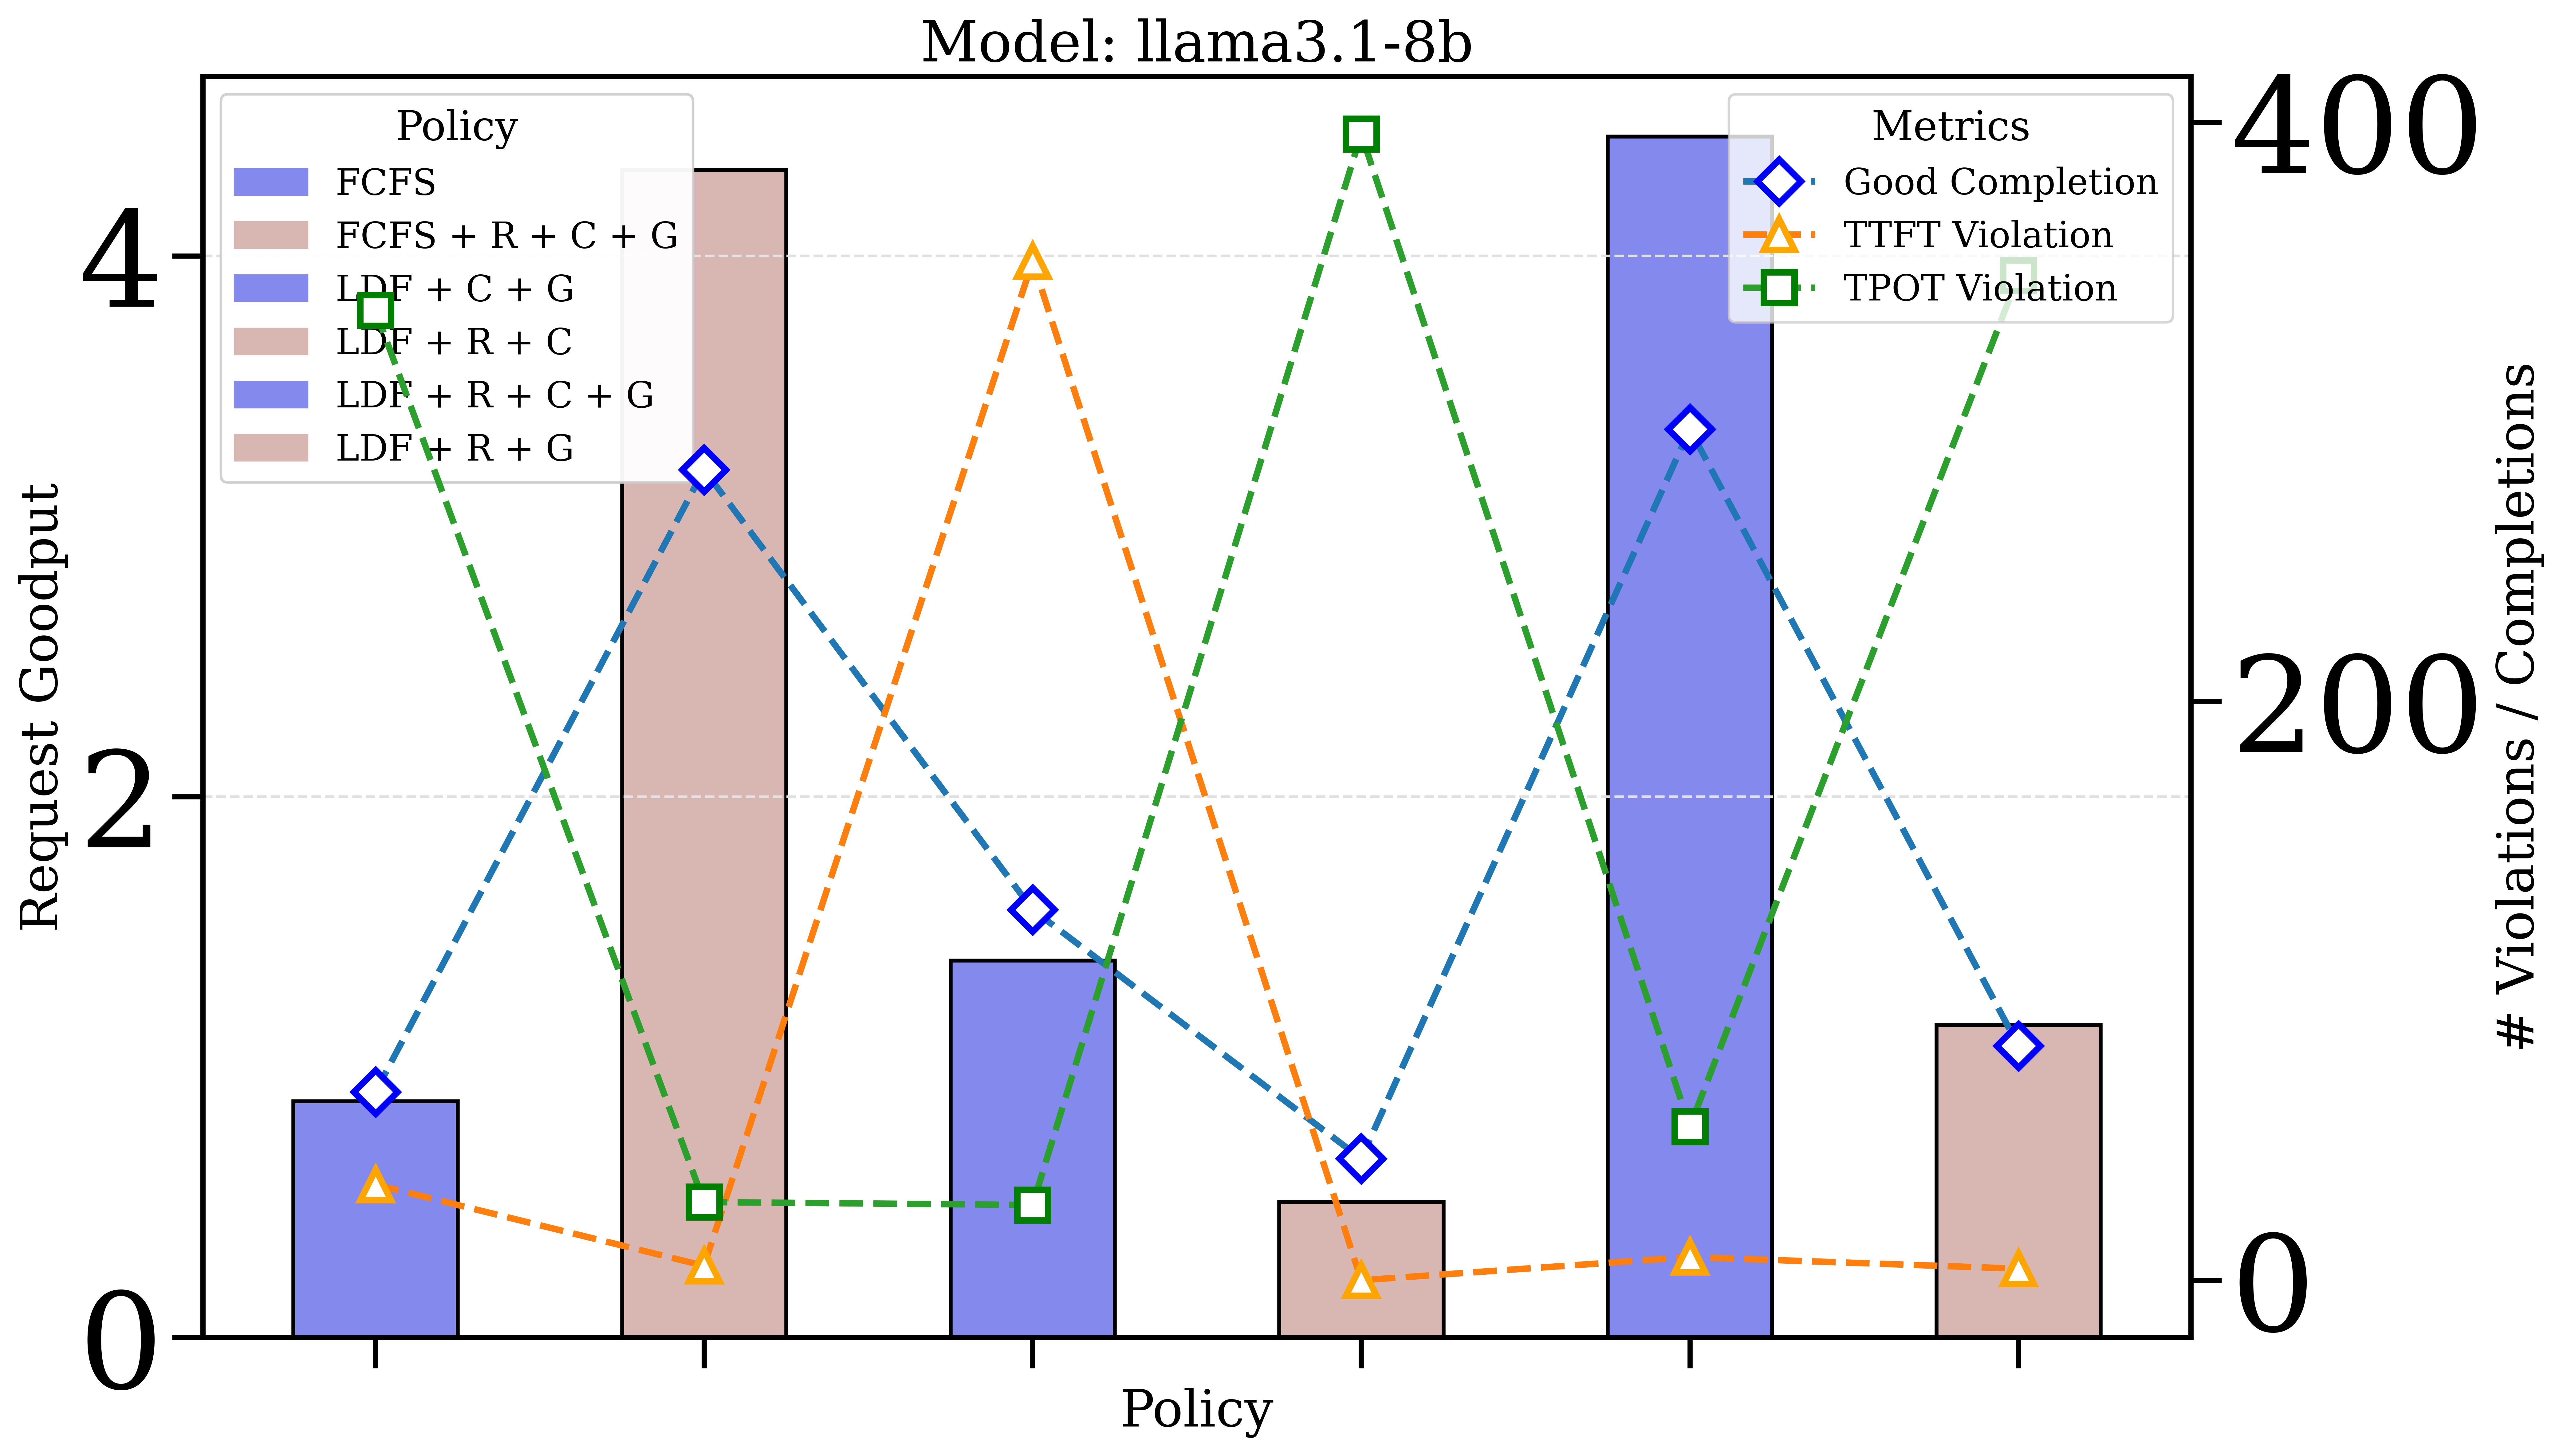

In [8]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# === 可选：设定JSON路径 ===
json_files = [
    "round1_fcfs_prompts_512_qps_16.json",
    "round1_fcfs_rej_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_prompts_512_qps_16.json"
]

# 策略缩写函数
def get_policy_abbr(policy: str) -> str:
    abbr = []
    if 'fcfs' in policy:
        abbr.append("FCFS")
    if 'ldf' in policy:
        abbr.append("LDF")
    if 'rej' in policy:
        abbr.append("R")
    if 'credit' in policy:
        abbr.append("C")
    if 'gate' in policy:
        abbr.append("G")
    return ' + '.join(abbr)

# 模型名提取函数
def extract_model_name(model_path: str) -> str:
    return model_path.strip("/").split("/")[-1]

# === 读取数据 ===
policies, good_completion, ttft_violation, tpot_violation, goodput = [], [], [], [], []
model_name = None

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        policies.append(get_policy_abbr(data["policy"]))
        good_completion.append(data["good_completion"])
        ttft_violation.append(data["ttft_violation"])
        tpot_violation.append(data["tpot_violation"])
        goodput.append(data["request_goodput"])
        if not model_name:
            model_name = extract_model_name(data["model_id"])

# === 可视化 ===
x = np.arange(len(policies))
width = 0.5
color1, color2 = "#8389ed", "#d8b7b2"
bar_colors = [color1 if i % 2 == 0 else color2 for i in range(len(policies))]

fig, ax1 = plt.subplots(figsize=(14, 8))

# 柱状图：goodput
bars = ax1.bar(x, goodput, width, edgecolor='black', linewidth=1.5, color=bar_colors)
ax1.set_ylabel('Request Goodput', fontsize=20)
ax1.set_xlabel('Policy', fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(['' for _ in x])  # 不显示 X 标签
ax1.set_title(f'Model: {model_name}', fontsize=22)

# 折线图：其他指标
ax2 = ax1.twinx()
ax2.set_ylabel('# Violations / Completions', fontsize=20)

markers = {
    'Good Completion': {'data': good_completion, 'marker': 'D', 'facecolor': 'white', 'edgecolor': 'blue'},
    'TTFT Violation': {'data': ttft_violation, 'marker': '^', 'facecolor': 'white', 'edgecolor': 'orange'},
    'TPOT Violation': {'data': tpot_violation, 'marker': 's', 'facecolor': 'white', 'edgecolor': 'green'},
}

lines = []
for label, style in markers.items():
    line = ax2.plot(
        x, style['data'],
        linestyle='--',
        marker=style['marker'],
        markersize=12,
        markerfacecolor=style['facecolor'],
        markeredgewidth=2.5,
        markeredgecolor=style['edgecolor'],
        linewidth=2.5,
        label=label
    )
    lines.append(line[0])

# === 图例设置 ===
# 策略图例
policy_handles = [plt.Rectangle((0, 0), 1, 1, color=c, edgecolor='black') for c in bar_colors]
policy_legend = ax1.legend(policy_handles, policies, title='Policy', loc='upper left', fontsize=14, title_fontsize=16)

# 指标图例
metrics_legend = ax2.legend(lines, list(markers.keys()), loc='upper right', title='Metrics', fontsize=14, title_fontsize=16)

ax1.add_artist(policy_legend)
ax1.grid(True, axis='y', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


/tmp/ipykernel_987216/459940682.py:113: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  policy_handles = [plt.Rectangle((0, 0), 1, 1, color=policy_color_map[p], edgecolor='black') for p in policies]


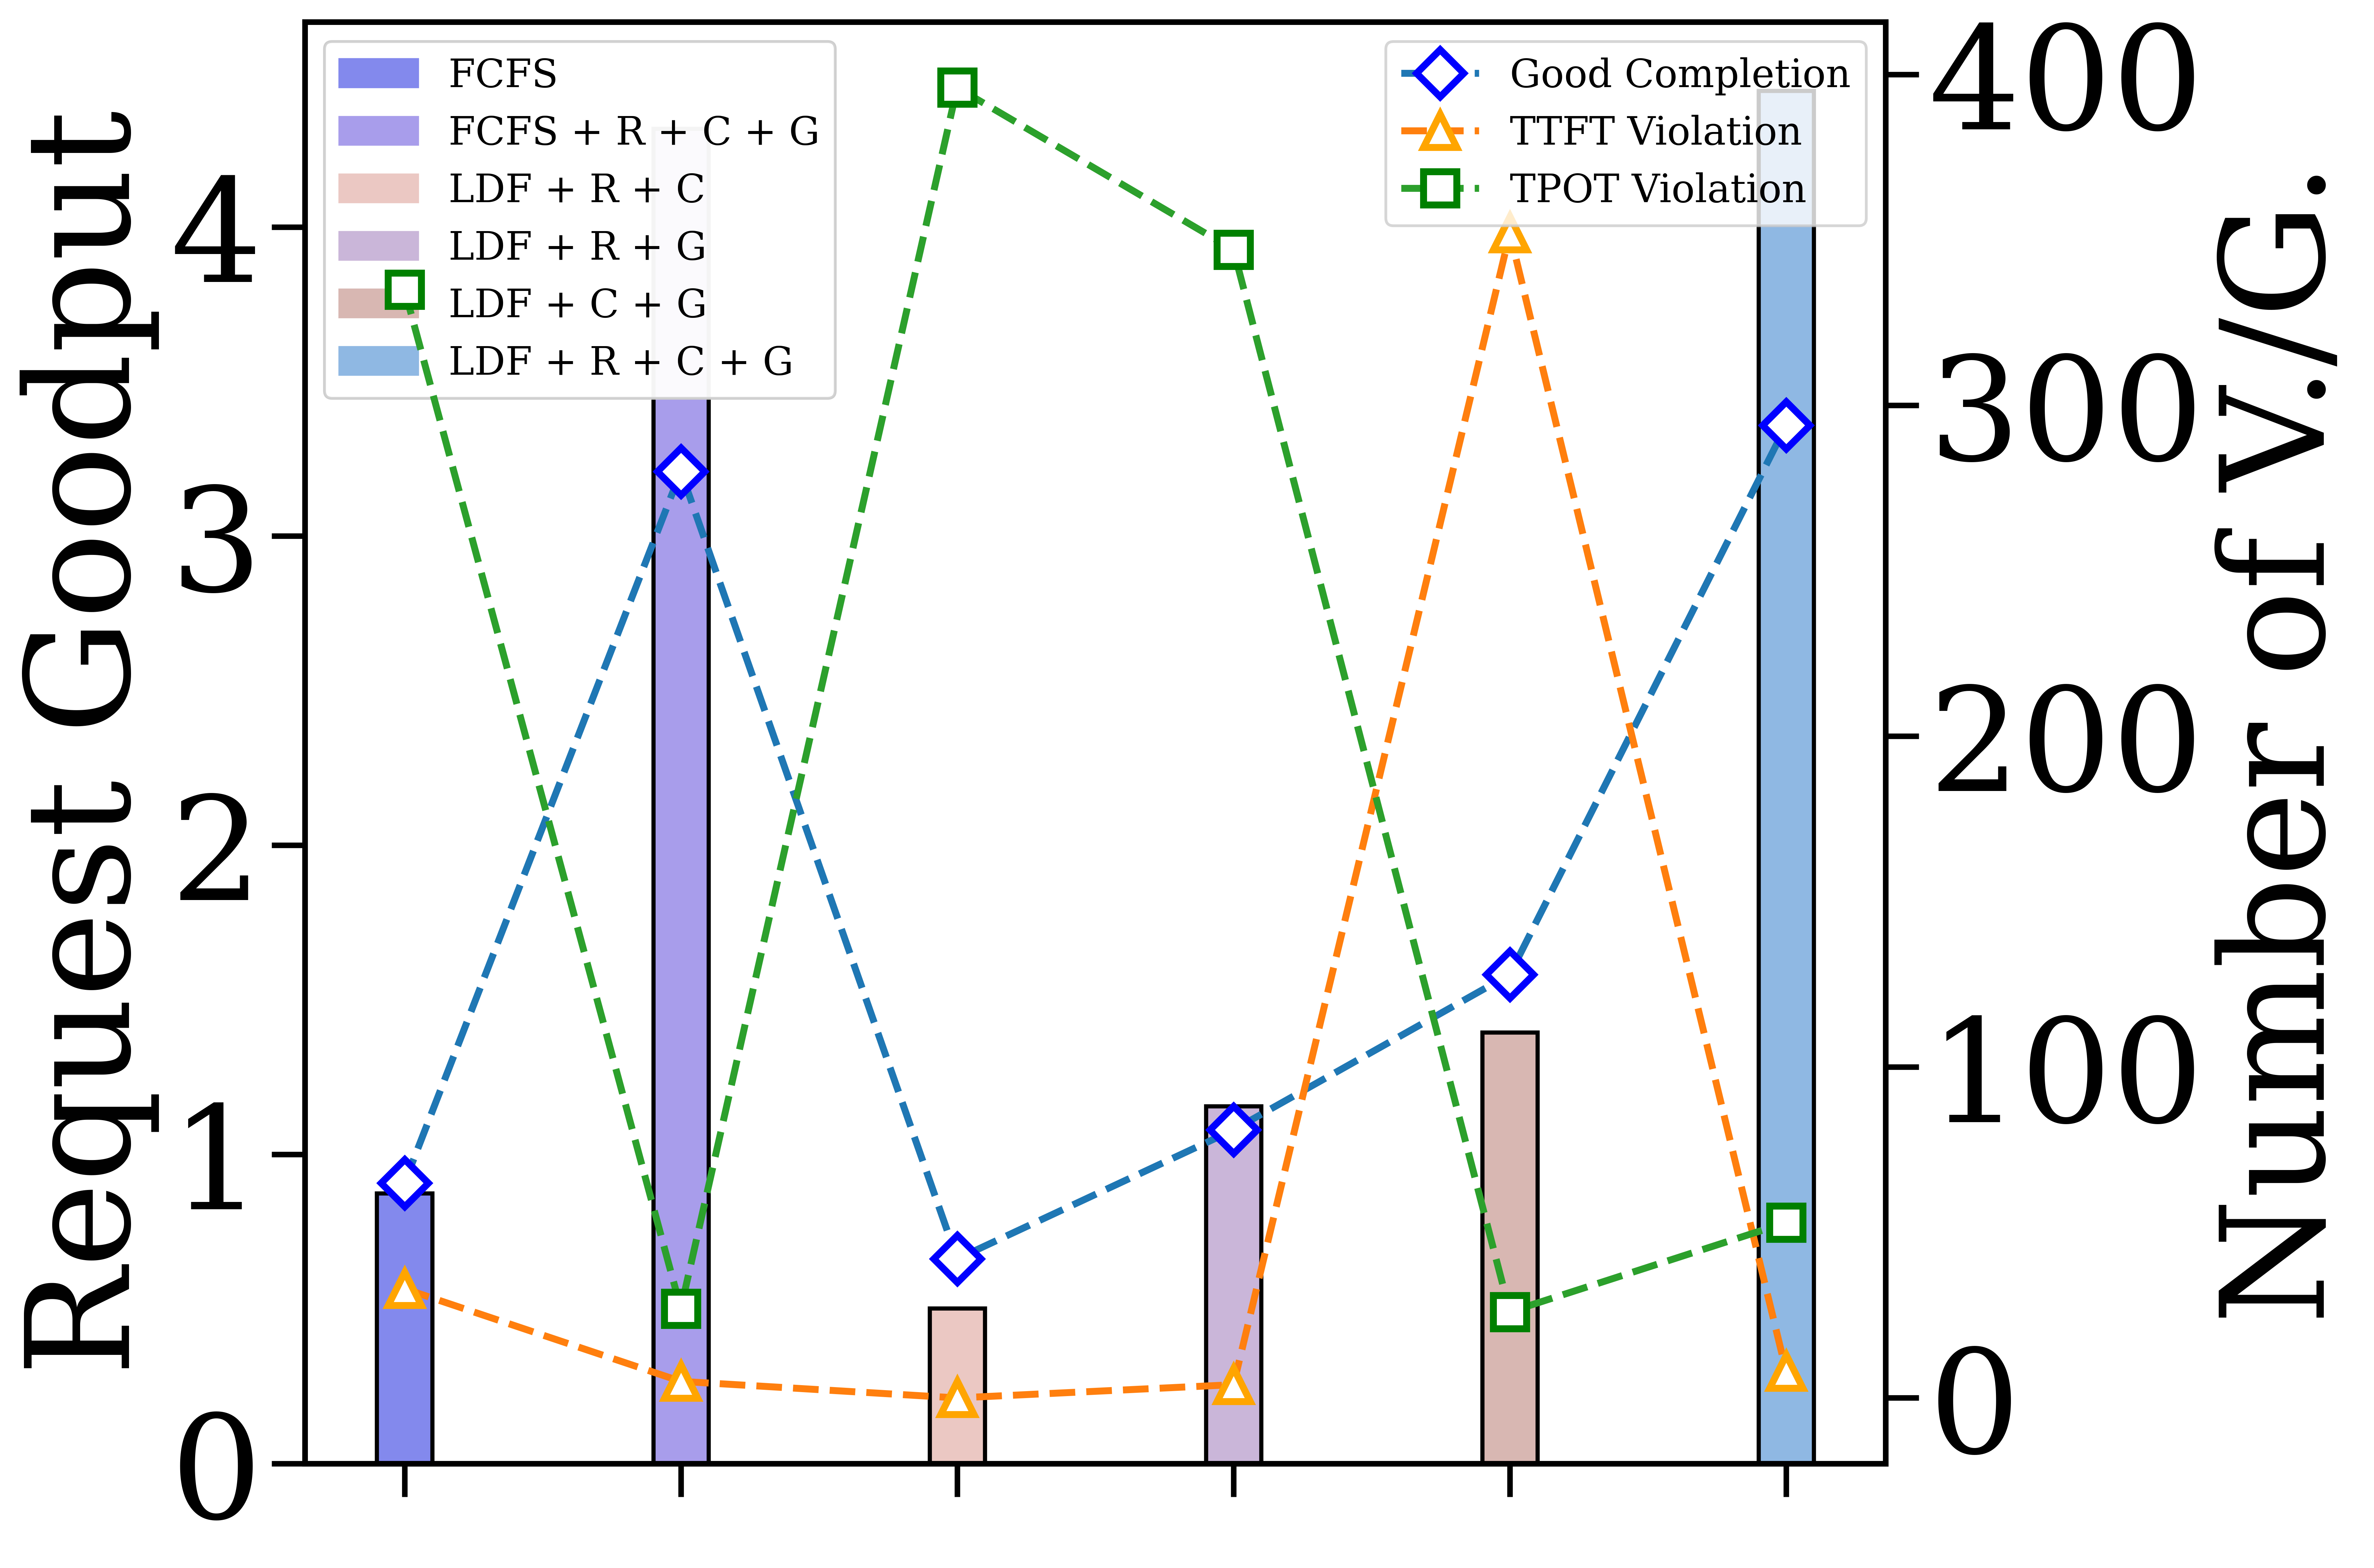

In [23]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# === 样式设置 ===
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 52
plt.rcParams['axes.labelsize'] = 52
plt.rcParams['lines.linewidth'] = 8
plt.rcParams['lines.markersize'] = 30
plt.rcParams['xtick.labelsize'] = 52
plt.rcParams['ytick.labelsize'] = 52
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize'] = 38
plt.rcParams['figure.dpi'] = 600
# legend 字体大小
plt.rcParams['legend.fontsize'] = 14

# === JSON文件路径 ===
json_files = [
    "round1_fcfs_prompts_512_qps_16.json",
    "round1_fcfs_rej_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_prompts_512_qps_16.json",
    "round1_ldf_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_credit_prompts_512_qps_16.json",
]

# === 策略缩写函数 ===
def get_policy_abbr(policy: str) -> str:
    abbr = []
    if 'fcfs' in policy:
        abbr.append("FCFS")
    if 'ldf' in policy:
        abbr.append("LDF")
    if 'rej' in policy:
        abbr.append("R")
    if 'credit' in policy:
        abbr.append("C")
    if 'gate' in policy:
        abbr.append("G")
    return ' + '.join(abbr)

# === 提取模型名称函数 ===
def extract_model_name(model_path: str) -> str:
    return model_path.strip("/").split("/")[-1]

# === 数据读取 ===
policies, good_completion, ttft_violation, tpot_violation, goodput = [], [], [], [], []
model_name = None

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        policy_abbr = get_policy_abbr(data["policy"])
        policies.append(policy_abbr)
        good_completion.append(data["good_completion"])
        ttft_violation.append(data["ttft_violation"])
        tpot_violation.append(data["tpot_violation"])
        goodput.append(data["request_goodput"])
        if not model_name:
            model_name = extract_model_name(data["model_id"])

# === 定义每种策略对应颜色 ===
policy_color_map = {
    "FCFS": "#8389ed",
    "FCFS + R + C + G": "#a89deb",
    "LDF + C + G": "#d8b7b2",
    "LDF + R + C": "#ebc8c3",
    "LDF + R + C + G": "#8fb8e3",
    "LDF + R + G": "#cab6d9",
}
bar_colors = [policy_color_map[p] for p in policies]

# === 可视化 ===
x = np.arange(len(policies))
width = 0.2
fig, ax1 = plt.subplots()

# Goodput 柱状图
bars = ax1.bar(x, goodput, width, edgecolor='black', linewidth=1.5, color=bar_colors)
ax1.set_ylabel('Request Goodput')
# ax1.set_xlabel('Policy', fontsize=20)
ax1.set_xticks(x)
ax1.set_xticklabels(['' for _ in x])
# ax1.set_title(f'Model: {model_name}')

# 折线图：Metrics
ax2 = ax1.twinx()
ax2.set_ylabel('Number of V./G.')
markers = {
    'Good Completion': {'data': good_completion, 'marker': 'D', 'facecolor': 'white', 'edgecolor': 'blue'},
    'TTFT Violation': {'data': ttft_violation, 'marker': '^', 'facecolor': 'white', 'edgecolor': 'orange'},
    'TPOT Violation': {'data': tpot_violation, 'marker': 's', 'facecolor': 'white', 'edgecolor': 'green'},
}
lines = []
for label, style in markers.items():
    line = ax2.plot(
        x, style['data'],
        linestyle='--',
        marker=style['marker'],
        markersize=12,
        markerfacecolor=style['facecolor'],
        markeredgewidth=2.5,
        markeredgecolor=style['edgecolor'],
        linewidth=2.5,
        label=label
    )
    lines.append(line[0])

# 图例设置
policy_handles = [plt.Rectangle((0, 0), 1, 1, color=policy_color_map[p], edgecolor='black') for p in policies]
policy_legend = ax1.legend(policy_handles, policies, loc='upper left')
metrics_legend = ax2.legend(lines, list(markers.keys()), loc='upper right')
ax1.add_artist(policy_legend)

# 样式微调
# ax1.grid(True, axis='y', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()


/tmp/ipykernel_987216/1674356659.py:108: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  policy_handles = [plt.Rectangle((0, 0), 1, 1, color=policy_color_map[p], edgecolor='black') for p in policies]


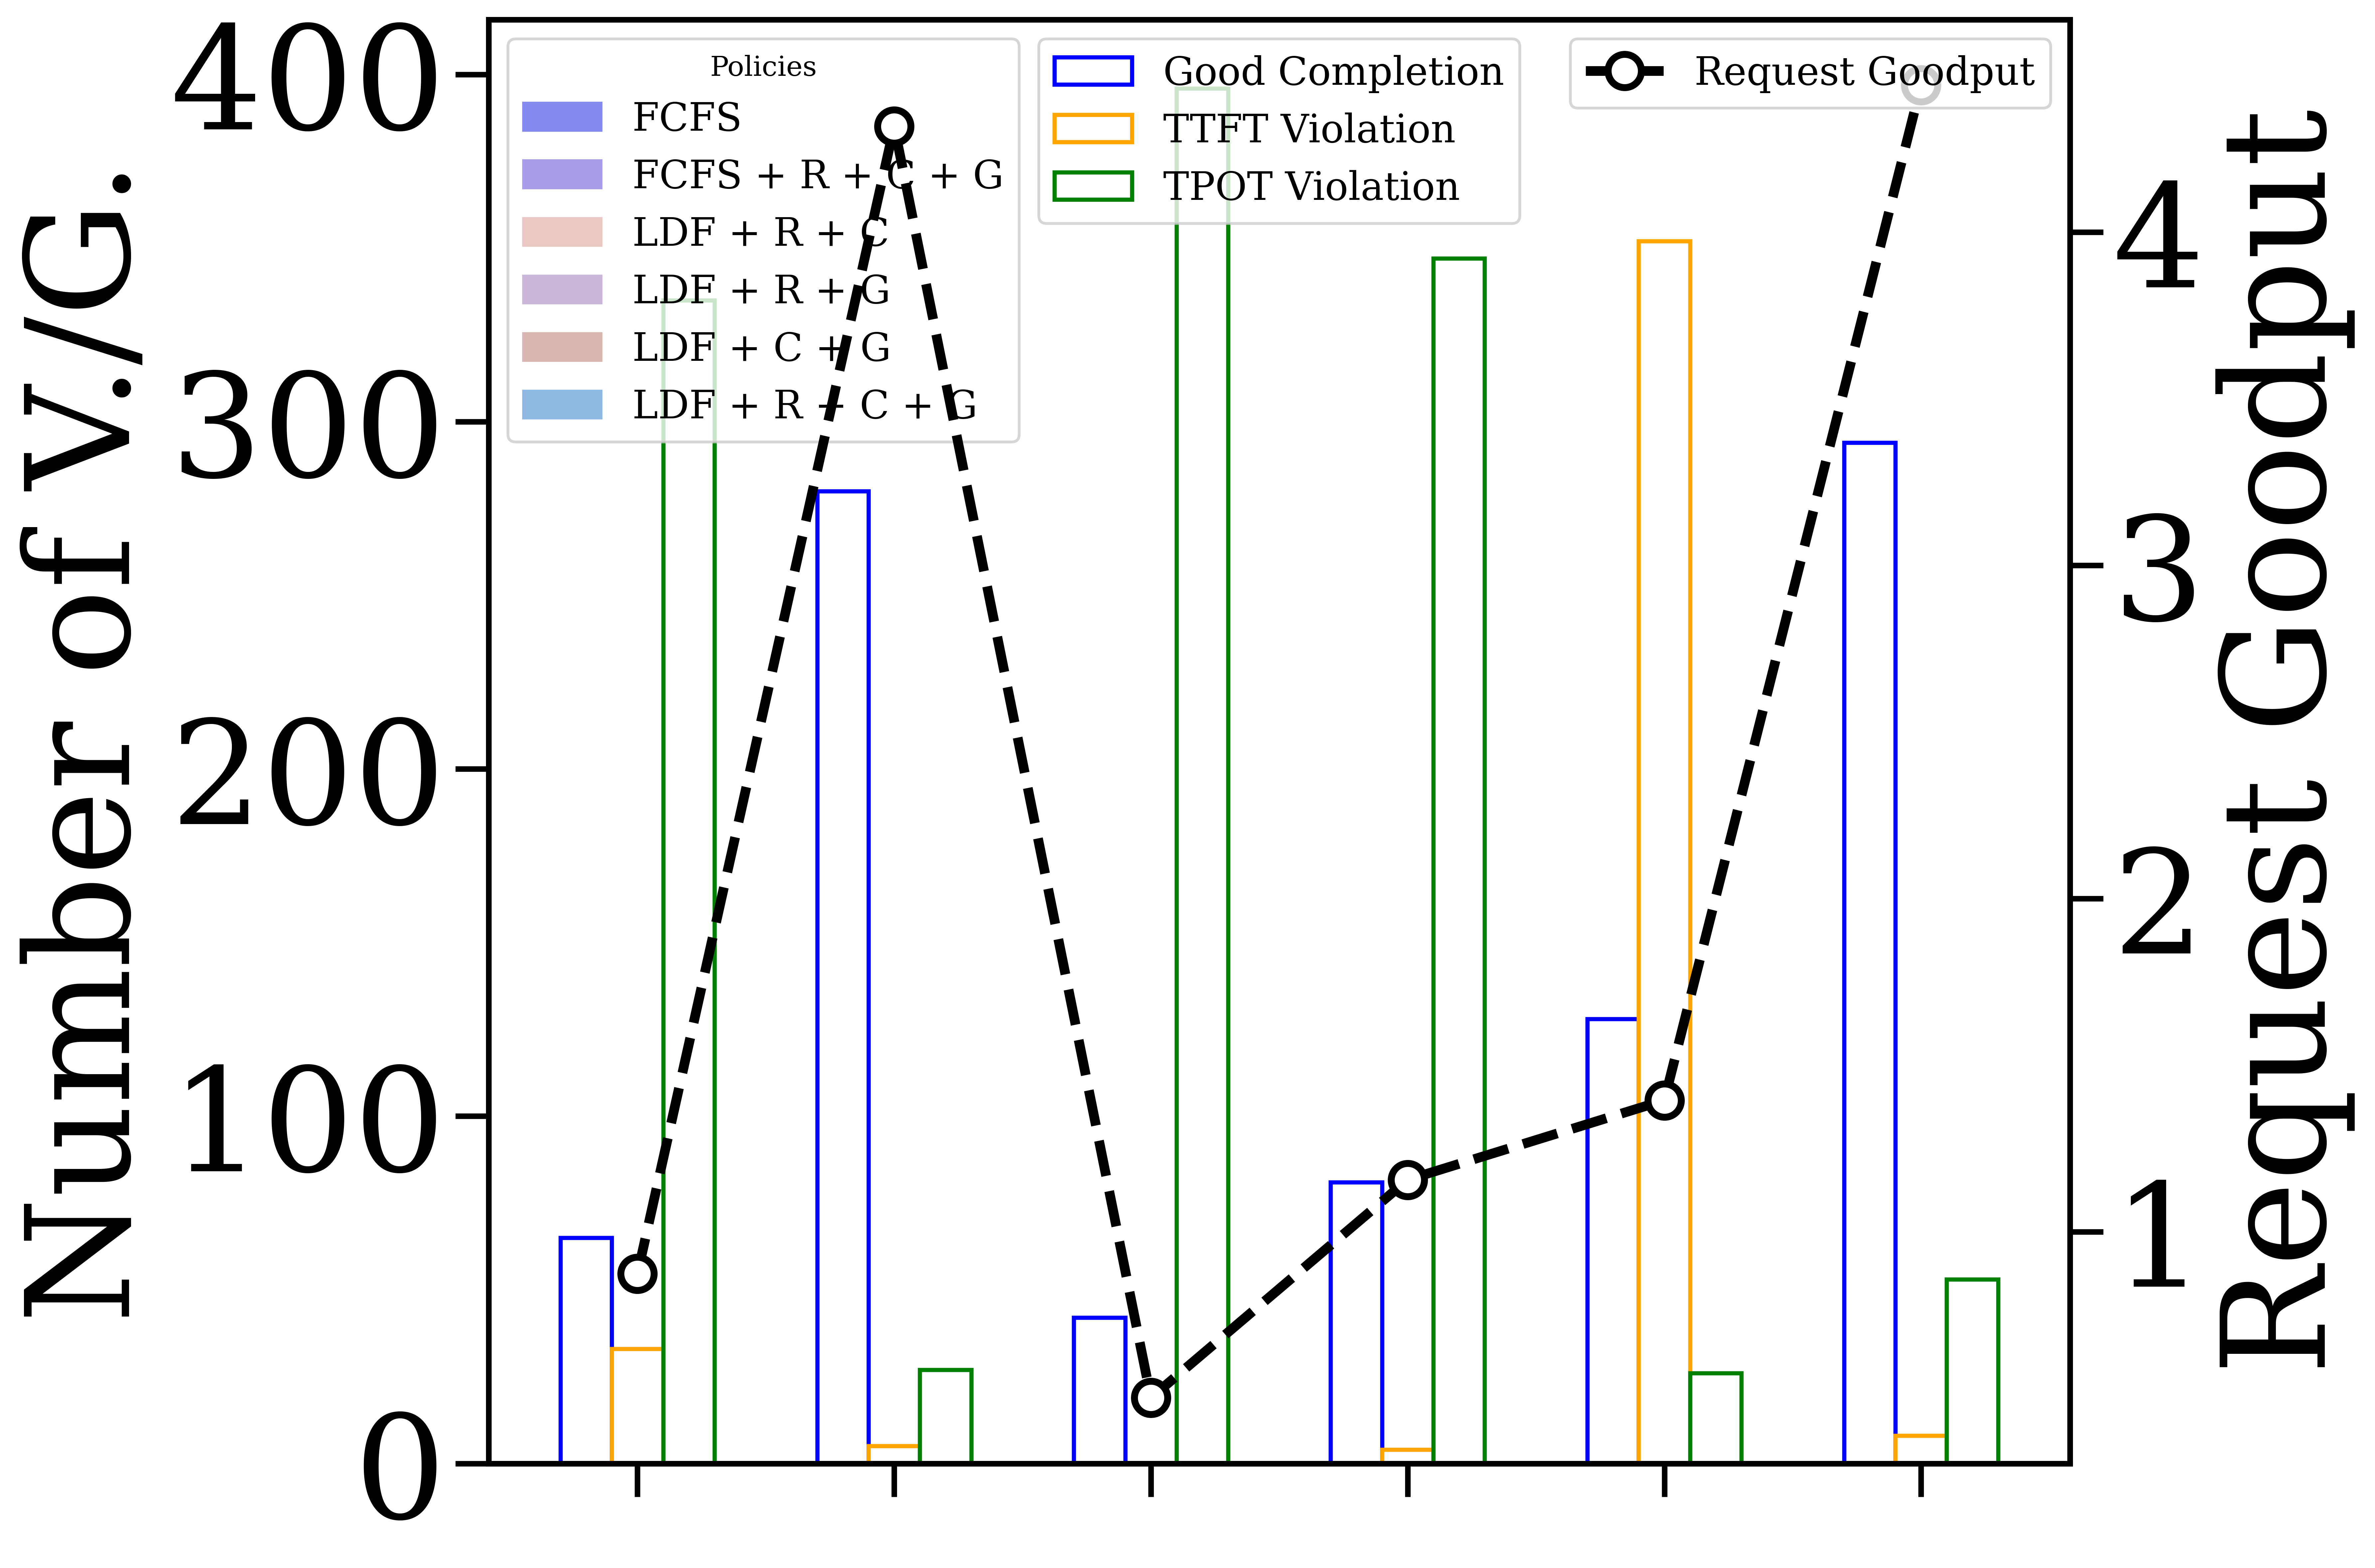

In [24]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# === 样式设置 ===
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 52
plt.rcParams['axes.labelsize'] = 52
plt.rcParams['lines.linewidth'] = 8
plt.rcParams['lines.markersize'] = 30
plt.rcParams['xtick.labelsize'] = 52
plt.rcParams['ytick.labelsize'] = 52
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize'] = 38
plt.rcParams['figure.dpi'] = 600
plt.rcParams['legend.fontsize'] = 14

# === JSON文件路径 ===
json_files = [
    "round1_fcfs_prompts_512_qps_16.json",
    "round1_fcfs_rej_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_prompts_512_qps_16.json",
    "round1_ldf_gate1.35_credit_prompts_512_qps_16.json",
    "round1_ldf_rej_gate1.35_credit_prompts_512_qps_16.json",
]

# === 策略缩写函数 ===
def get_policy_abbr(policy: str) -> str:
    abbr = []
    if 'fcfs' in policy:
        abbr.append("FCFS")
    if 'ldf' in policy:
        abbr.append("LDF")
    if 'rej' in policy:
        abbr.append("R")
    if 'credit' in policy:
        abbr.append("C")
    if 'gate' in policy:
        abbr.append("G")
    return ' + '.join(abbr)

# === 提取模型名称函数 ===
def extract_model_name(model_path: str) -> str:
    return model_path.strip("/").split("/")[-1]

# === 数据读取 ===
policies, good_completion, ttft_violation, tpot_violation, goodput = [], [], [], [], []
model_name = None

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        policy_abbr = get_policy_abbr(data["policy"])
        policies.append(policy_abbr)
        good_completion.append(data["good_completion"])
        ttft_violation.append(data["ttft_violation"])
        tpot_violation.append(data["tpot_violation"])
        goodput.append(data["request_goodput"])
        if not model_name:
            model_name = extract_model_name(data["model_id"])

# === 定义策略颜色 ===
policy_color_map = {
    "FCFS": "#8389ed",
    "FCFS + R + C + G": "#a89deb",
    "LDF + C + G": "#d8b7b2",
    "LDF + R + C": "#ebc8c3",
    "LDF + R + C + G": "#8fb8e3",
    "LDF + R + G": "#cab6d9",
}
bar_colors = [policy_color_map[p] for p in policies]

# === 可视化 ===
x = np.arange(len(policies))
width = 0.2
fig, ax1 = plt.subplots()

# 三个 metric 的柱状图
bar1 = ax1.bar(x - width, good_completion, width, label='Good Completion',
               color='white', edgecolor='blue', linewidth=1.5)
bar2 = ax1.bar(x, ttft_violation, width, label='TTFT Violation',
               color='white', edgecolor='orange', linewidth=1.5)
bar3 = ax1.bar(x + width, tpot_violation, width, label='TPOT Violation',
               color='white', edgecolor='green', linewidth=1.5)
ax1.set_ylabel('Number of V./G.')
ax1.set_xticks(x)
ax1.set_xticklabels(['' for _ in x])

# Goodput 折线图
ax2 = ax1.twinx()
line = ax2.plot(
    x, goodput,
    linestyle='--',
    marker='o',
    markersize=12,
    markerfacecolor='white',
    markeredgewidth=2.5,
    markeredgecolor='black',
    linewidth=3.5,
    label='Request Goodput',
    color='black'
)
ax2.set_ylabel('Request Goodput')

# 图例设置
policy_handles = [plt.Rectangle((0, 0), 1, 1, color=policy_color_map[p], edgecolor='black') for p in policies]
policy_legend = ax1.legend(policy_handles, policies, loc='upper left', title="Policies")
metrics_legend = ax1.legend([bar1, bar2, bar3], ['Good Completion', 'TTFT Violation', 'TPOT Violation'], loc='upper center')
ax1.add_artist(policy_legend)
ax2.legend(line, ['Request Goodput'], loc='upper right')

# 样式收尾
plt.tight_layout()
plt.show()


/tmp/ipykernel_290780/3080463371.py:117: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  policy_handles = [plt.Rectangle((0, 0), 1, 1, color=policy_color_map[p], edgecolor='black') for p in policies]


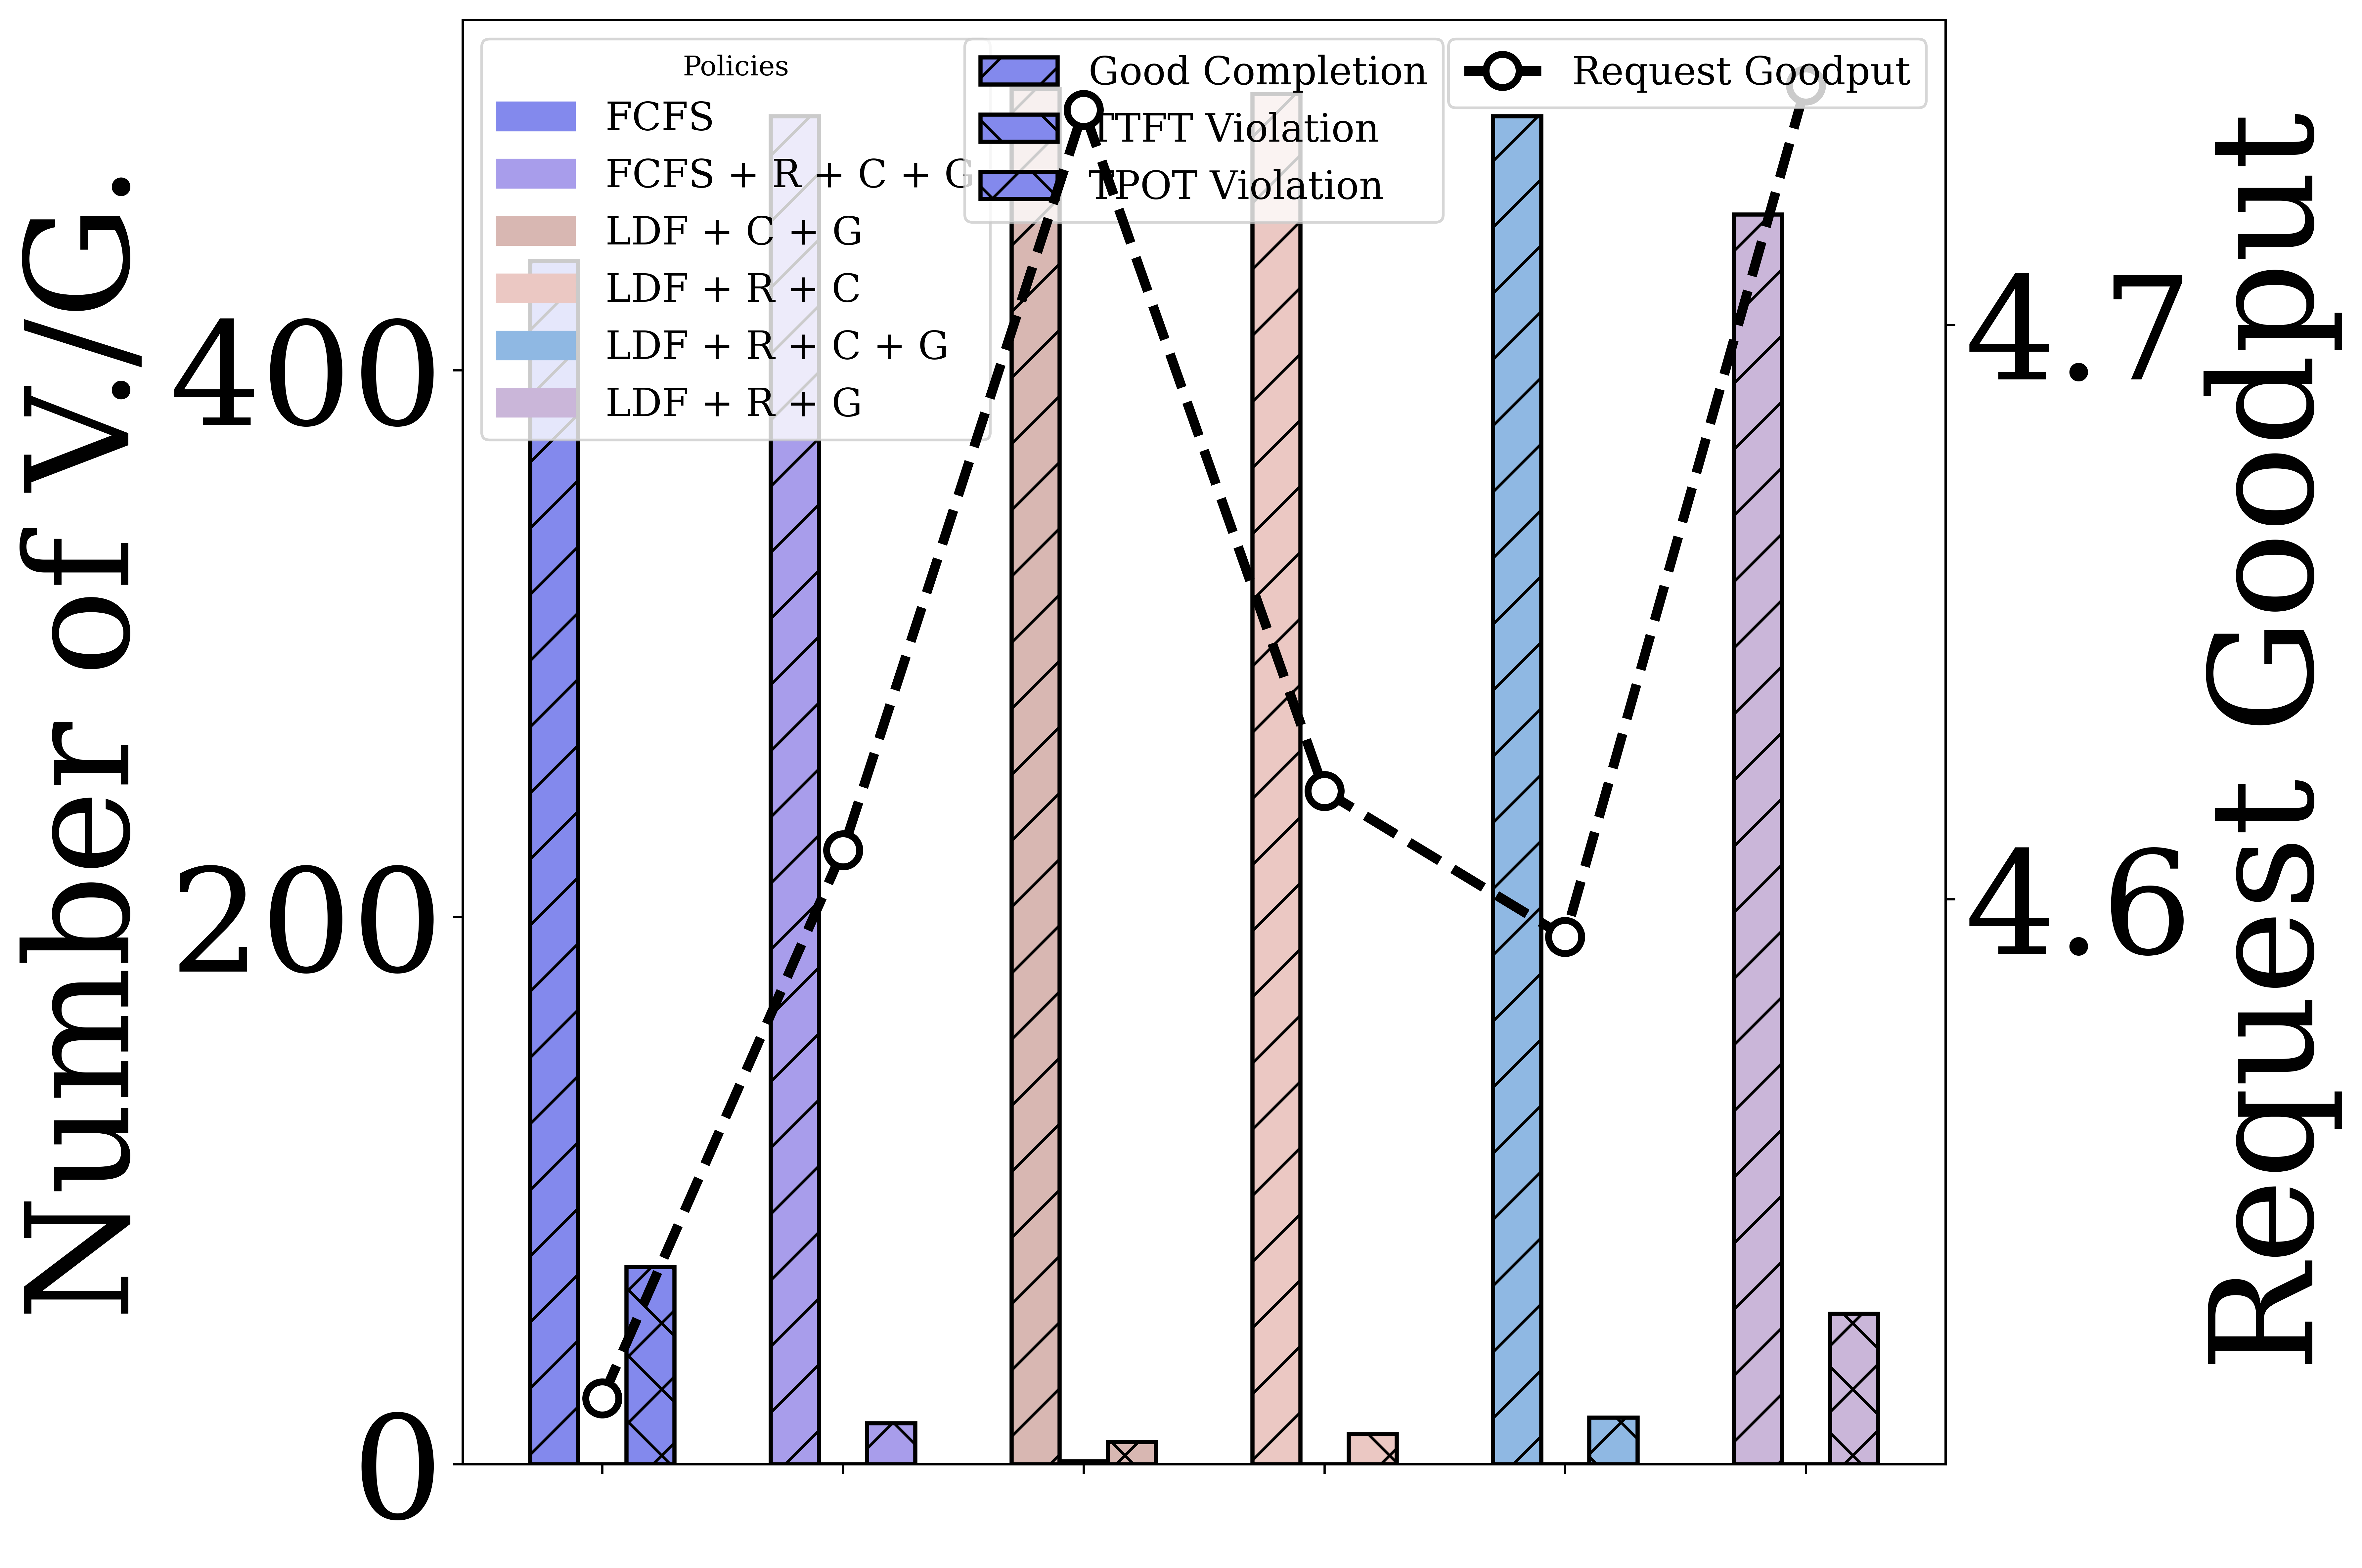

In [5]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# === 样式设置 ===
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 52
plt.rcParams['axes.labelsize'] = 52
plt.rcParams['lines.linewidth'] = 8
plt.rcParams['lines.markersize'] = 30
plt.rcParams['xtick.labelsize'] = 52
plt.rcParams['ytick.labelsize'] = 52
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.dpi'] = 600

# === JSON文件路径 ===
json_files = [
        "r1_fcfs_qps_8.json",
        "r1_fcfs_rej_gate1.4_credit_qps_8.json",
        "r1_ldf_gate1.4_credit_qps_8.json",
        "r1_ldf_rej_credit_qps_8.json",
        "r1_ldf_rej_gate1.4_credit_qps_8.json",
        "r1_ldf_rej_gate1.4_qps_8.json"
]





# === 策略缩写函数 ===
def get_policy_abbr(policy: str) -> str:
    abbr = []
    if 'fcfs' in policy:
        abbr.append("FCFS")
    if 'ldf' in policy:
        abbr.append("LDF")
    if 'rej' in policy:
        abbr.append("R")
    if 'credit' in policy:
        abbr.append("C")
    if 'gate' in policy:
        abbr.append("G")
    return ' + '.join(abbr)

# === 提取模型名称函数 ===
def extract_model_name(model_path: str) -> str:
    return model_path.strip("/").split("/")[-1]

# === 数据读取 ===
policies, good_completion, ttft_violation, tpot_violation, goodput = [], [], [], [], []
model_name = None

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        policy_abbr = get_policy_abbr(data["policy"])
        policies.append(policy_abbr)
        good_completion.append(data["good_completion"])
        ttft_violation.append(data["ttft_violation"])
        tpot_violation.append(data["tpot_violation"])
        goodput.append(data["request_goodput"])
        if not model_name:
            model_name = extract_model_name(data["model_id"])

# === 策略颜色映射 ===
policy_color_map = {
    "FCFS": "#8389ed",
    "FCFS + R + C + G": "#a89deb",
    "LDF + C + G": "#d8b7b2",
    "LDF + R + C": "#ebc8c3",
    "LDF + R + C + G": "#8fb8e3",
    "LDF + R + G": "#cab6d9",
}
bar_colors = [policy_color_map[p] for p in policies]

# === 绘图 ===
x = np.arange(len(policies))
width = 0.2
fig, ax1 = plt.subplots()

# 三种 metric 的带 hatch 柱状图
hatch_styles = {
    'Good Completion': '/',
    'TTFT Violation': '\\',
    'TPOT Violation': 'x'
}

bar1 = ax1.bar(x - width, good_completion, width, label='Good Completion',
               color=bar_colors, edgecolor='black', hatch=hatch_styles['Good Completion'], linewidth=1.5)
bar2 = ax1.bar(x, ttft_violation, width, label='TTFT Violation',
               color=bar_colors, edgecolor='black', hatch=hatch_styles['TTFT Violation'], linewidth=1.5)
bar3 = ax1.bar(x + width, tpot_violation, width, label='TPOT Violation',
               color=bar_colors, edgecolor='black', hatch=hatch_styles['TPOT Violation'], linewidth=1.5)
ax1.set_ylabel('Number of V./G.')
ax1.set_xticks(x)
ax1.set_xticklabels(['' for _ in x])

# Goodput 折线图
ax2 = ax1.twinx()
line = ax2.plot(
    x, goodput,
    linestyle='--',
    marker='o',
    markersize=12,
    markerfacecolor='white',
    markeredgewidth=2.5,
    markeredgecolor='black',
    linewidth=3.5,
    label='Request Goodput',
    color='black'
)
ax2.set_ylabel('Request Goodput')

# 图例
policy_handles = [plt.Rectangle((0, 0), 1, 1, color=policy_color_map[p], edgecolor='black') for p in policies]
policy_legend = ax1.legend(policy_handles, policies, loc='upper left', title="Policies")

metric_handles = [bar1[0], bar2[0], bar3[0]]
metric_labels = list(hatch_styles.keys())
metrics_legend = ax1.legend(metric_handles, metric_labels, loc='upper center')

ax1.add_artist(policy_legend)
ax2.legend(line, ['Request Goodput'], loc='upper right')

# 收尾
plt.tight_layout()
plt.show()


In [4]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# === 样式设置 ===
# === 样式设置 ===
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 52
plt.rcParams['axes.labelsize'] = 52
plt.rcParams['lines.linewidth'] = 8
plt.rcParams['lines.markersize'] = 30
plt.rcParams['xtick.labelsize'] = 42
plt.rcParams['ytick.labelsize'] = 42
plt.rcParams['font.family'] = 'serif'
plt.rcParams['legend.fontsize'] = 28
plt.rcParams['figure.dpi'] = 600

# === JSON文件路径 ===
json_files = [
    "r1_fcfs_qps_14.json",
    "r1_fcfs_gate1.4_credit_qps_14.json",
    "r1_ldf_rej_qps_14.json",
    "r1_ldf_rej_gate1.4_credit_qps_14.json",
]

# === 策略缩写函数 ===
def get_policy_abbr(policy: str) -> str:
    abbr = []
    if 'fcfs' in policy:
        abbr.append("FCFS")
    if 'ldf' in policy:
        abbr.append("LDF")
    if 'rej' in policy:
        abbr.append("R")
    if 'credit' in policy:
        abbr.append("C")
    if 'gate' in policy:
        abbr.append("G")
    return ' + '.join(abbr)

# === 提取模型名称函数 ===
def extract_model_name(model_path: str) -> str:
    return model_path.strip("/").split("/")[-1]

# === 策略缩写到最终显示名称映射 ===
policy_display_map = {
    "FCFS": "vLLM",
    "FCFS + C + G": f"+TPOT\nGuard",
    "LDF + R": f"+TTFT\nGuard",
    "LDF + R + C + G": "Scorpio"
}

# === Violation 色彩定义（固定颜色）===
ttft_color = "#ec6446"  # 红色系
tpot_color = "#836ed5"  # 紫色系

# === 数据读取 ===
policies, good_completion, ttft_violation, tpot_violation, goodput = [], [], [], [], []
model_name = None

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        abbr = get_policy_abbr(data["policy"])
        policy = policy_display_map[abbr]
        policies.append(policy)
        good_completion.append(data["good_completion"])
        ttft_violation.append(data["ttft_violation"])
        tpot_violation.append(data["tpot_violation"])
        goodput.append(data["request_goodput"])
        if not model_name:
            model_name = extract_model_name(data["model_id"])

# === 绘图 ===
x = np.arange(len(policies))
width = 0.2
fig, ax1 = plt.subplots()

# Violation 柱状图
bar2 = ax1.bar(
    x, ttft_violation, width,
    label='TTFT Violation',
    color=ttft_color,
    edgecolor='black',
    linewidth=1.5
)
bar3 = ax1.bar(
    x + width, tpot_violation, width,
    label='TPOT Violation',
    color=tpot_color,
    edgecolor='black',
    linewidth=1.5
)

ax1.set_ylabel('# of Violation')
ax1.set_xticks(x + width / 2)
ax1.set_xticklabels(policies)

# Goodput 折线图（点居中）
ax2 = ax1.twinx()
line = ax2.plot(
    x + width / 2, goodput,
    linestyle='--',
    marker='o',
    markersize=12,
    markerfacecolor='white',
    markeredgewidth=2.5,
    markeredgecolor='black',
    linewidth=3.5,
    label='Request Goodput',
    color='black'
)
ax2.set_ylabel('Goodput')
ax2.set_yticks([3,4])

# 图例
metric_handles = [bar2[0], bar3[0]]
metric_labels = ['TTFT Violation', 'TPOT Violation']
# ax1.legend(metric_handles, metric_labels, loc='upper left')
# ax2.legend(line, ['Goodput'], loc='upper right')

plt.tight_layout()
plt.savefig(fname="ablation.pdf", dpi=600, format="pdf")
plt.close()
